In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [ ]:
df = pd.read_csv("twitter_training.csv", names=['id', 'topic', 'sentiment', 'text'])

df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
print(df.columns)

Index(['id', 'topic', 'sentiment', 'text'], dtype='object')


In [ ]:
import re
import string

def preprocess_text(text):

    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'#\w+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = text.lower()
    return text

In [ ]:
    df['cleaned_text'] = df['text'].apply(preprocess_text)

df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

df[['cleaned_text', 'sentiment']].head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


,cleaned_text,sentiment
0,im getting on borderlands and i will murder yo...,-0.6908
1,i am coming to the borders and i will kill you...,-0.6908
2,im getting on borderlands and i will kill you all,-0.6908
3,im coming on borderlands and i will murder you...,-0.6908
4,im getting on borderlands 2 and i will murder ...,-0.6908


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

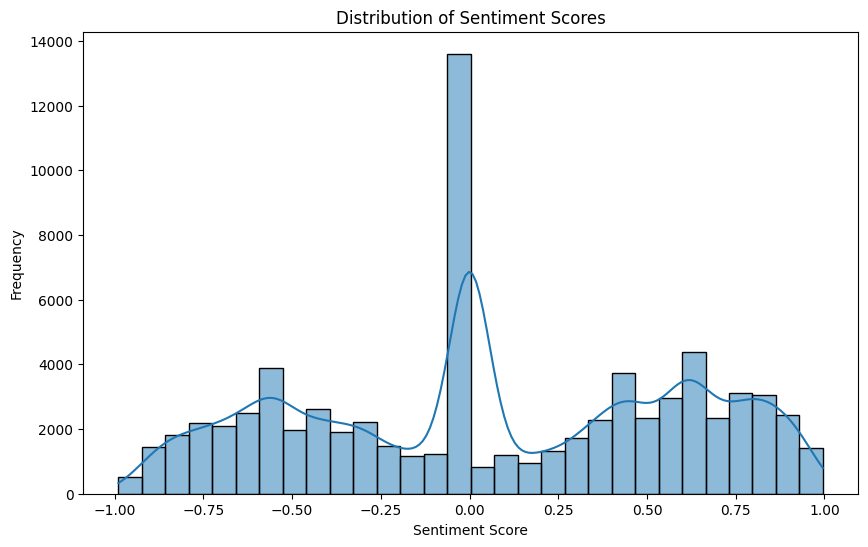

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    plt.figure(figsize=(14, 7))
    df.set_index('timestamp')['sentiment'].resample('D').mean().plot()
    plt.title('Sentiment Scores Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.show()

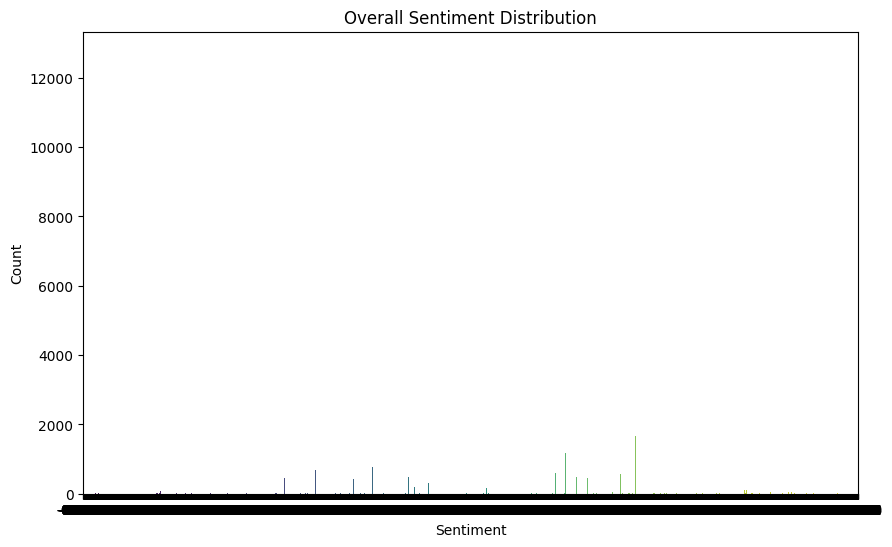

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='viridis', legend=False)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


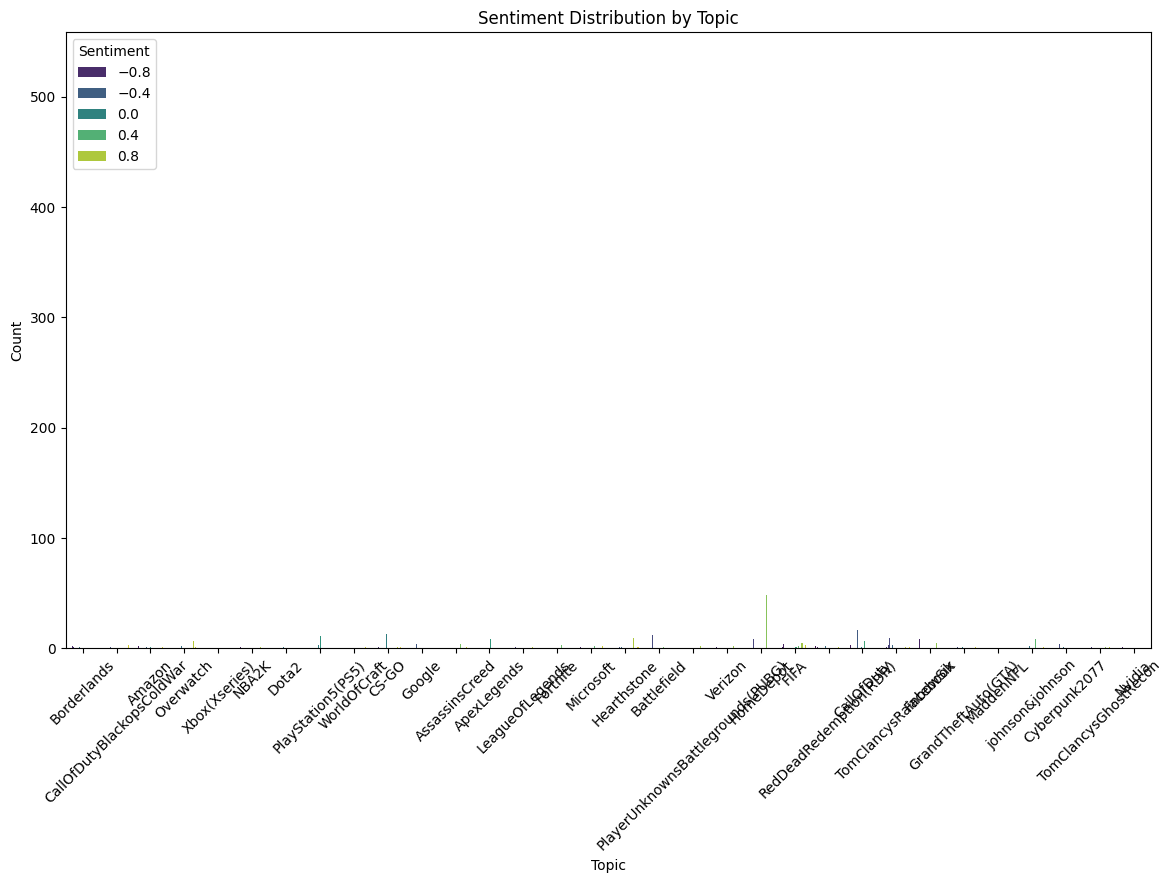

In [ ]:
#Sentiment Distribution by Topic
plt.figure(figsize=(14, 8))
sns.countplot(x='topic', hue='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


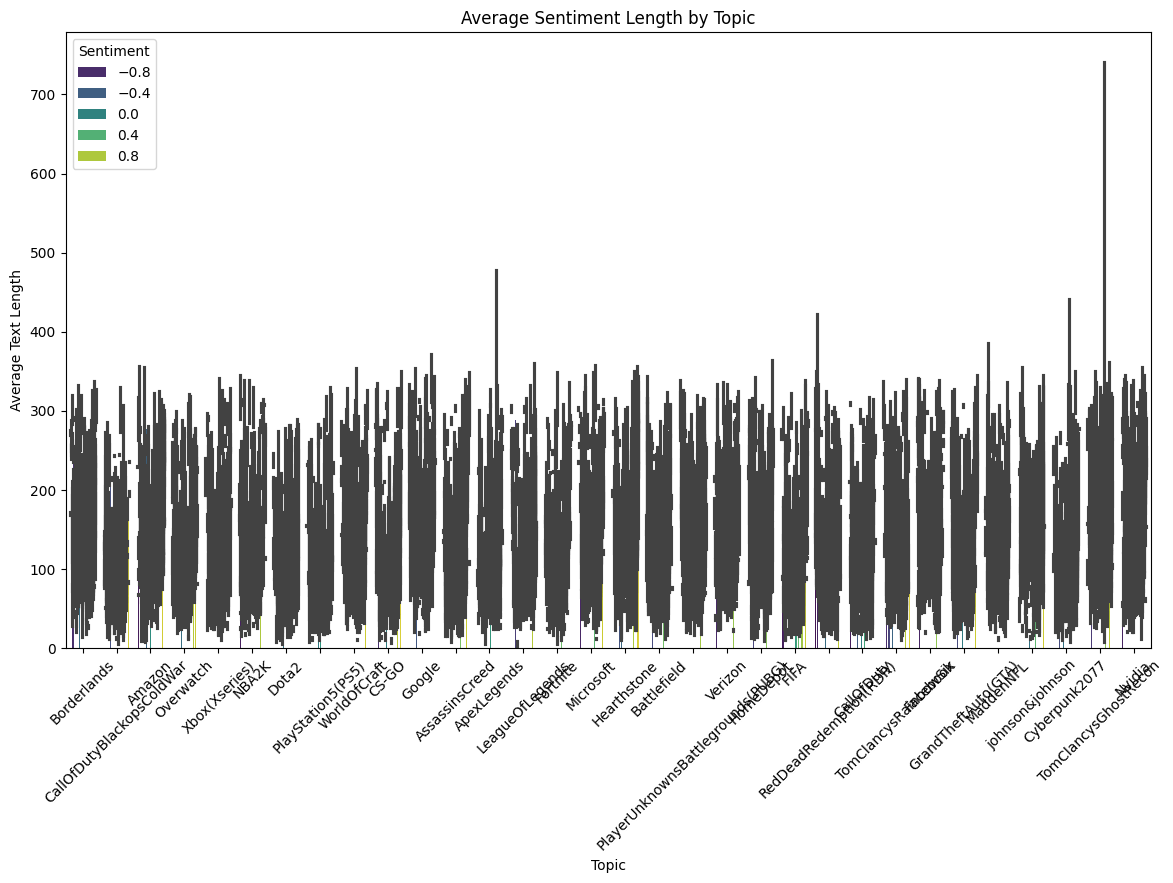

In [ ]:
# Average Sentiment Length by Topic
df['text_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(14, 8))
sns.barplot(x='topic', y='text_length', hue='sentiment', data=df, palette='viridis')
plt.title('Average Sentiment Length by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

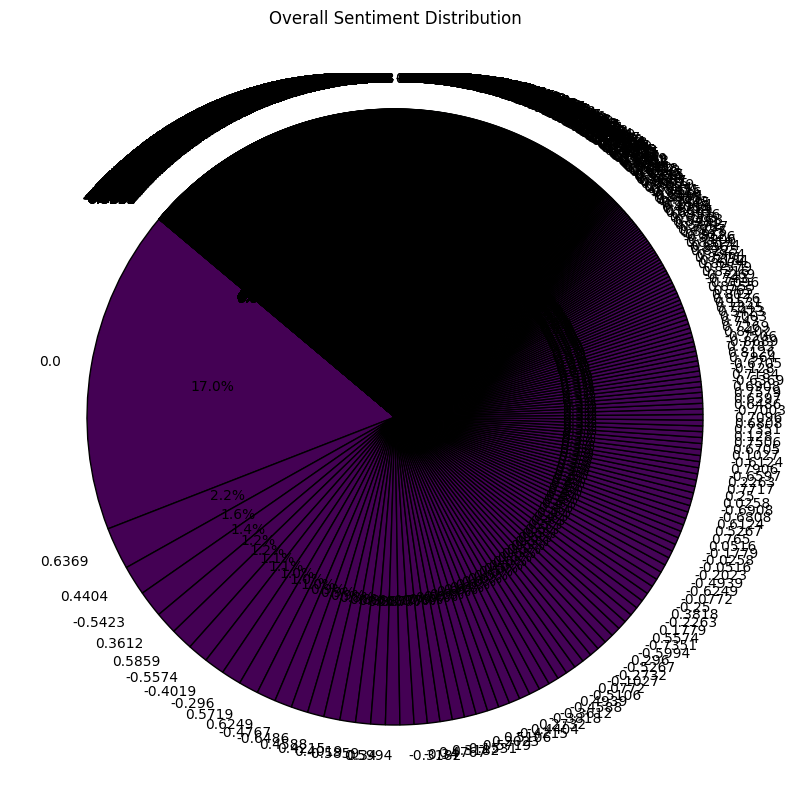

In [ ]:
#Overall Sentiment Distribution (Pie Chart)
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(labels)), wedgeprops={'edgecolor': 'black'})
plt.title('Overall Sentiment Distribution')
plt.show()